In [27]:
import pandas as pd
from IPython.display import display

# Set display options
pd.set_option('display.max_colwidth', 100)

# Read the data from the CSV file
data = pd.read_csv('../data/water_quality.csv')

# Display the first few rows of the data
display(data.head())

# Display the data types and summary statistics
display(data.describe())


,station,date,lat,lon,NO23,uni
0,21FLMANA_WQX-456,1995-11-20,27.532292,-82.688444,0.020,mg/L
1,21FLMANA_WQX-386,1995-11-27,27.605986,-82.601167,0.011,mg/L
2,21FLMANA_WQX-460,1995-11-20,27.516708,-82.685317,0.013,mg/L
3,21FLMANA_WQX-435,1995-11-27,27.533000,-82.666833,0.011,mg/L
4,21FLMANA_WQX-361,1995-11-27,27.628517,-82.591933,0.020,mg/L


,lat,lon,NO23
count,28354.000000,28354.000000,28354.000000
mean,27.878759,-82.549211,0.128806
std,0.149457,0.114437,3.005066
min,27.481117,-82.783203,0.001000
25%,27.781300,-82.633530,0.010000
50%,27.915001,-82.567497,0.018000
75%,27.985560,-82.445999,0.077000
max,28.181779,-82.281972,500.000000


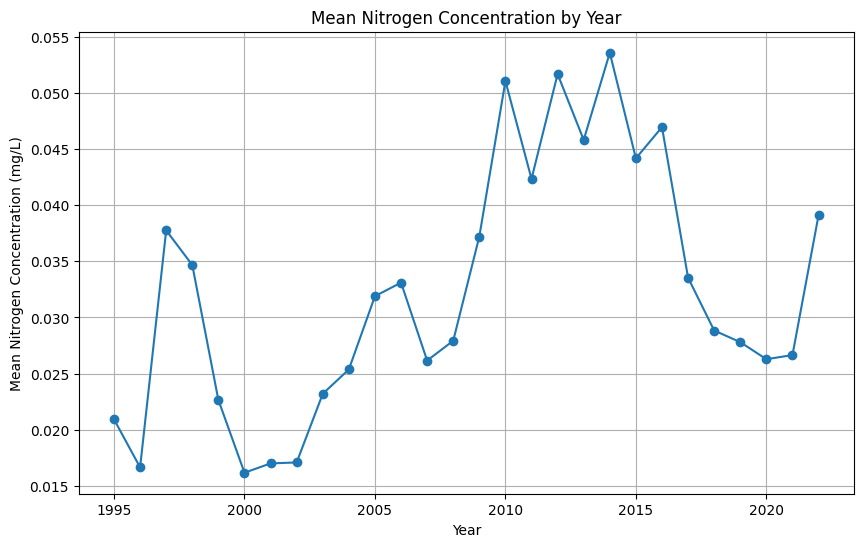

In [1]:
import pandas as pd

# Read the data from the CSV file
data = pd.read_csv('../data/water_quality.csv')

# Remove outliers using IQR method
Q1 = data['NO23'].quantile(0.25)
Q3 = data['NO23'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['NO23'] >= lower_bound) & (data['NO23'] <= upper_bound)]

# Calculate the mean nitrogen concentration by year
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
mean_by_year = data.groupby('year')['NO23'].mean()

# Plot the mean nitrogen concentration by year
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(mean_by_year.index, mean_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Mean Nitrogen Concentration (mg/L)')
plt.title('Mean Nitrogen Concentration by Year')
plt.grid(True)
plt.show()


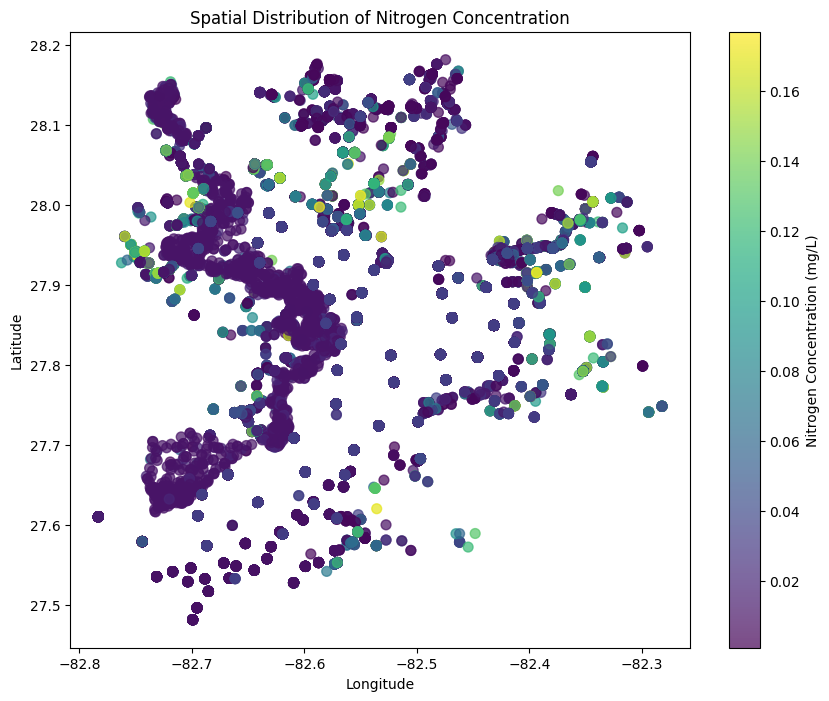

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Enable antialiasing
plt.rcParams['lines.antialiased'] = True

# Read the data from the CSV file
data = pd.read_csv('../data/water_quality.csv')

# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Remove outliers using IQR method
Q1 = data['NO23'].quantile(0.25)
Q3 = data['NO23'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['NO23'] >= lower_bound) & (data['NO23'] <= upper_bound)]

# Spatial Map (using latitude and longitude)
plt.figure(figsize=(10, 8))
plt.scatter(data['lon'], data['lat'], c=data['NO23'], cmap='viridis', alpha=0.7, s=50)
plt.colorbar(label='Nitrogen Concentration (mg/L)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Nitrogen Concentration')
plt.savefig('../figures/spatial_map.png', dpi=300)
plt.show(block=False)